In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from scipy.stats import f_oneway

In [77]:
#Descargo el archivo
archivo = pd.read_excel('UPPS solo Bulimia Tr atracon.xlsx')

#Primero analizo un poco el archivo, puedo crear un pequeño archivo, con una muestra de las primera 20 lineas,  para hacer operaciones
archivopequeño = archivo[:20]
print(archivopequeño)

    paciente fechaingre     fechae  fechanaci  hermanos  familia  \
0          1 2022-07-25 2022-07-27 1999-01-22         2        2   
1          2 2021-04-07 2021-05-21 2004-06-22         1        1   
2          3 2021-04-07 2021-05-21 2004-04-30         2        1   
3          4 2021-04-07 2021-05-21 2003-04-21         1        1   
4          5 2021-06-29 2021-09-03 2003-05-22         2        1   
5          6 2021-12-14 2022-02-13 2006-10-05         1        2   
6          7 2022-11-07 2022-11-29 2005-02-08         2        1   
7          8 2020-06-01 2021-06-14 2003-06-27         1        2   
8          9 2021-04-06 2021-06-14 1996-10-20         1        2   
9         10 2021-06-28 2021-09-07 2006-04-25         1        1   
10        11 2022-02-21 2022-03-14 2008-01-20         1        1   
11        12 2022-09-07 2022-11-24 2003-06-30         1        1   
12        13 2020-12-02 2021-06-16 2005-01-29         1        1   
13        14 2021-05-10 2021-06-16 2006-11-18   

In [78]:
#elimino valores nan  
archivo = archivo.dropna()
print(archivo)

    paciente fechaingre     fechae  fechanaci  hermanos  familia  \
0          1 2022-07-25 2022-07-27 1999-01-22         2        2   
1          2 2021-04-07 2021-05-21 2004-06-22         1        1   
2          3 2021-04-07 2021-05-21 2004-04-30         2        1   
3          4 2021-04-07 2021-05-21 2003-04-21         1        1   
4          5 2021-06-29 2021-09-03 2003-05-22         2        1   
..       ...        ...        ...        ...       ...      ...   
78        79 2021-03-10 2021-08-09 2005-11-08         2        1   
79        80 2020-11-09 2021-08-09 2000-10-20         1        2   
80        81 2020-10-19 2021-08-09 2003-03-11         1        2   
81        82 2019-06-20 2021-08-09 2003-05-03         1        1   
82        83 2022-04-04 2022-10-17 2000-05-18         2        1   

    paisnacimiento  edad  Curso  Repetircurso  ...  item56r  item57r  item58r  \
0                1    23     11             2  ...        2        3        3   
1                2   

In [79]:
print("El promedio de edad de las pacientes es")
print(str(archivo['edad'].mean()))

El promedio de edad de las pacientes es
17.42168674698795


In [80]:
print("El promedio de UPPS de las pacientes es")
print(str(archivo['impt'].mean()))

El promedio de UPPS de las pacientes es
141.710843373494


In [81]:
# Promedio de pacientes con diagnóstico valor 9
promedio_diagnostico_BN = archivo[archivo['Diagnostico'] == 9]['impt'].mean()
print("El promedio de UPPS de las pacientes con diagnóstico de Bulimia Nerviosa es: " + str(promedio_diagnostico_BN))

# Promedio de pacientes con diagnóstico valor 20
promedio_diagnostico_TA = archivo[archivo['Diagnostico'] == 20]['impt'].mean()
print("El promedio de UPPS de las pacientes con diagnóstico de Trastorno por atracones es: " + str(promedio_diagnostico_TA))


El promedio de UPPS de las pacientes con diagnóstico de Bulimia Nerviosa es: 140.5909090909091
El promedio de UPPS de las pacientes con diagnóstico de Trastorno por atracones es: 142.97435897435898


In [82]:
#El valor max. de la escala impusividad es: 
archivo['impt'].max()

197

In [83]:
#El valor min. de la escala impusividad es: 
archivo['impt'].min()

97

In [84]:
#la media de impulsividad segun el rango de edad es: 
# Crear los rangos de edad
rangos_edad = pd.cut(archivo['edad'], [12, 15, 18, 21, 30])

# Calcular la media de impt en cada rango de edad
media_imp = archivo['impt'].groupby(rangos_edad).mean()

# Mostrar los resultados
for rango, media in media_imp.iteritems():
    print(f"La media de impulsividad para el rango de edad {rango} es: {media:.2f}")

La media de impulsividad para el rango de edad (12, 15] es: 146.43
La media de impulsividad para el rango de edad (15, 18] es: 142.05
La media de impulsividad para el rango de edad (18, 21] es: 133.57
La media de impulsividad para el rango de edad (21, 30] es: 133.71


In [85]:
#Correlación entre Grado de impulsividad y diagnostico
#import pandas as pd
#from scipy.stats import pointbiserialr

# Cargar el archivo Excel como un dataframe de pandas
archivos = pd.read_excel('UPPS solo Bulimia Tr atracon.xlsx')

# Calcular la correlación biserial puntual
corr, pvalor = pointbiserialr(archivos['impt'], archivos['Diagnostico'])

# Imprimir el coeficiente de correlación y el valor p
print('Coeficiente de correlación biserial puntual:', corr)
print('Valor p:', pvalor)
print('Un coeficiente de correlación biserial puntual de 0.05360521502032823 lo cual sugiere una correlación muy débil entre las variables de impulsividad medida por UPSS y el diagnostico de Bulimia nerviosa vs trastorno por atracones.')

Coeficiente de correlación biserial puntual: 0.05360521502032823
Valor p: 0.6302985757032749
Un coeficiente de correlación biserial puntual de 0.05360521502032823 lo cual sugiere una correlación muy débil entre las variables de impulsividad medida por UPSS y el diagnostico de Bulimia nerviosa vs trastorno por atracones.


In [86]:
#Correlación entre grado de impulsivdad y el diagnostico a travez de otro método
#import pandas as pd
#from scipy.stats import f_oneway

grupo_BN = archivo[archivo['Diagnostico'] == 9]['impt']
grupo_TA = archivo[archivo['Diagnostico'] == 20]['impt']

f_val, p_val = f_oneway(grupo_BN, grupo_TA)

print("El valor de p es",p_val)

if p_val < 0.05:
    print("Por lo tanto, hay diferencias significativas entre los grupos")
else:
    print("Por lo tanto, no se detectan diferencias significativas entre los grupos")

El valor de p es 0.6302985757032766
Por lo tanto, no se detectan diferencias significativas entre los grupos


In [87]:
# Calcular la correlación biserial puntual entre impt y Actividad
corr, p_value = pointbiserialr(archivo['impt'], archivo['Actividad'])

# Mostrar el resultado
print("Correlación biserial puntual entre impt y Actividad: {:.3f}".format(corr))
print("Valor p: {:.3f}".format(p_value))


Correlación biserial puntual entre impt y Actividad: 0.071
Valor p: 0.521


In [88]:

# Crear un diccionario para almacenar los resultados
media_imp_actividad = {}

# Iterar por cada actividad
for i in range(1, 28):
    # Filtrar los datos de la actividad i
    datos_actividad_i = archivo[archivo['Actividad'] == i]
    # Calcular la media de impt de la actividad i
    media_imp_actividad[i] = datos_actividad_i['impt'].mean()

# Mostrar los resultados
for i in range(1, 28):
    print("La media de impt para la actividad", i, "es:", media_imp_actividad[i])




La media de impt para la actividad 1 es: 134.1904761904762
La media de impt para la actividad 2 es: 148.33333333333334
La media de impt para la actividad 3 es: 140.3
La media de impt para la actividad 4 es: 144.5
La media de impt para la actividad 5 es: 141.0
La media de impt para la actividad 6 es: 145.58333333333334
La media de impt para la actividad 7 es: nan
La media de impt para la actividad 8 es: 169.5
La media de impt para la actividad 9 es: 111.0
La media de impt para la actividad 10 es: nan
La media de impt para la actividad 11 es: nan
La media de impt para la actividad 12 es: 130.33333333333334
La media de impt para la actividad 13 es: 111.0
La media de impt para la actividad 14 es: 146.0
La media de impt para la actividad 15 es: 138.0
La media de impt para la actividad 16 es: 136.5
La media de impt para la actividad 17 es: 168.0
La media de impt para la actividad 18 es: 131.0
La media de impt para la actividad 19 es: nan
La media de impt para la actividad 20 es: nan
La media

In [89]:
from scipy import stats

# Agrupar por actividad y calcular el promedio de impt
actividad_promedio = archivo.groupby('Actividad')['impt'].mean()

# Calcular la correlación biserial puntual entre impt y actividad
corr, pval = stats.pointbiserialr(archivo['Actividad'], archivo['impt'])

# Mostrar los resultados
print("Correlación biserial puntual entre grado de impulsividad y Actividad:", corr)
print("Valor p:", pval)

# Ver si hay una correlación significativa
if pval < 0.05:
    print("Hay una correlación significativa entre tipo de actividad y grado de impulsividad")
else:
    print("No hay una correlación significativa entre tipo de actividad y grado de  impulsividad")


Correlación biserial puntual entre grado de impulsividad y Actividad: 0.07142422409602166
Valor p: 0.5210955705466015
No hay una correlación significativa entre tipo de actividad y grado de  impulsividad


In [90]:
from scipy import stats

# Agrupar por tipo de familia y calcular el promedio de impt
familia_promedio = archivo.groupby('familia')['impt'].mean()

# Calcular la correlación biserial puntual entre impt y actividad
corr, pval = stats.pointbiserialr(archivo['familia'], archivo['impt'])

# Mostrar los resultados
print("Correlación biserial puntual entre grado de impulsividad y Familia:", corr)
print("Valor p:", pval)

# Ver si hay una correlación significativa
if pval < 0.05:
    print("Hay una correlación significativa entre tipo de familia y grado de impulsividad")
else:
    print("No hay una correlación significativa entre tipo de familia y grado de impulsividad")

Correlación biserial puntual entre grado de impulsividad y Familia: 0.18655994360401792
Valor p: 0.09127183302298626
No hay una correlación significativa entre tipo de familia y grado de impulsividad


In [91]:
from scipy import stats

# Agrupar por tipo de repetir curso y calcular el promedio de impt
repetircurso_promedio = archivo.groupby('Repetircurso')['impt'].mean()

# Calcular la correlación biserial puntual entre impt y actividad
corr, pval = stats.pointbiserialr(archivo['Repetircurso'], archivo['impt'])

# Mostrar los resultados
print("Correlación biserial puntual entre impt y Repetir curso:", corr)
print("Valor p:", pval)

# Ver si hay una correlación significativa
if pval < 0.05:
    print("Hay una correlación significativa entre Repetir curso e impt")
else:
    print("No hay una correlación significativa entre Repetir curso e impt")

Correlación biserial puntual entre impt y Repetir curso: -0.12185975057094149
Valor p: 0.27244283405852954
No hay una correlación significativa entre Repetir curso e impt


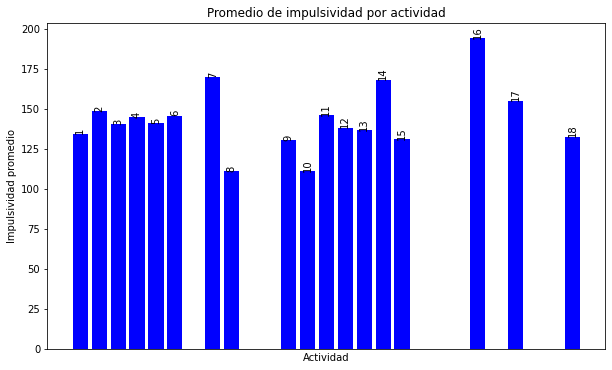

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por actividad y calcular el promedio de impt
actividad_promedio = archivo.groupby('Actividad')['impt'].mean()

# Ordenar las actividades de forma ascendente
actividad_promedio = actividad_promedio.sort_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras
grafica_barras = ax.bar(actividad_promedio.index, actividad_promedio.values, color='blue')

# Añadir el número de actividad encima de cada barra
for i, rect in enumerate(grafica_barras):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, str(i+1), ha='center', va='bottom', rotation=90)
    
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


# Personalizar los ejes y el título
ax.set_xlabel('Actividad')
ax.set_ylabel('Impulsividad promedio')
ax.set_title('Promedio de impulsividad por actividad')

# Mostrar la gráfica
plt.show()




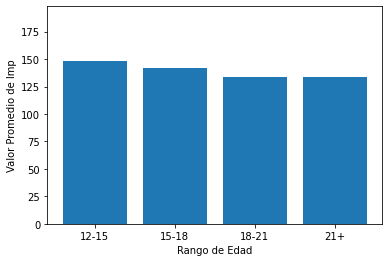

In [93]:
# Crear una nueva columna con los rangos de edad correspondientes
bins = [12, 15, 18, 21, archivo['edad'].max()]
labels = ['12-15', '15-18', '18-21', '21+']
archivo['edad_Rango'] = pd.cut(archivo['edad'], bins=bins, labels=labels, include_lowest=True)

# Calcular el promedio de imp para cada rango de edad
edad_promedio = archivo.groupby('edad_Rango')['impt'].mean()

# Crear la gráfica de barras con los promedios de imp para cada rango de edad
plt.bar(edad_promedio.index, edad_promedio.values)

# Configurar los ejes y la etiqueta del eje y
plt.xlabel('Rango de Edad')
plt.ylabel('Valor Promedio de Imp')
plt.ylim(0, archivo['impt'].max() + 1)

# Mostrar la gráfica
plt.show()


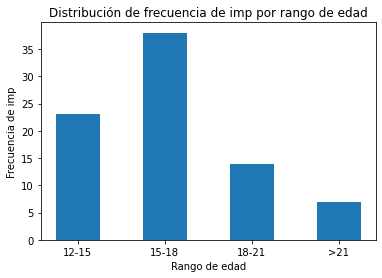

In [94]:
import pandas as pd
import matplotlib.pyplot as plt


# Crear los rangos de edad
rangos_edad = pd.cut(archivo['edad'], [12, 15, 18, 21, 150])

# Contar la frecuencia de los valores de "imp" en cada rango
frecuencia_imp = archivo['impt'].groupby(rangos_edad).count()

# Crear el histograma
plt.bar(['12-15', '15-18', '18-21', '>21'], frecuencia_imp, width=0.5)

# Agregar etiquetas
plt.xlabel('Rango de edad')
plt.ylabel('Frecuencia de imp')
plt.title('Distribución de frecuencia de imp por rango de edad')

# Mostrar el histograma
plt.show()



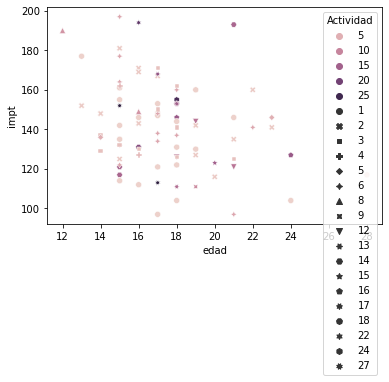

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="edad", y="impt", hue="Actividad", data=archivo, style="Actividad")
plt.show()

